In [1]:
import pandas as pd
import numpy as np

print("LOAD DAN PREPROCESSING DATA USA REAL ESTATE")

df = pd.read_csv("realtor-data.csv")
print("data sebelum cleaning:")
print(df.head())

LOAD DAN PREPROCESSING DATA USA REAL ESTATE
data sebelum cleaning:
   brokered_by    status     price  bed  bath  acre_lot     street  \
0     103378.0  for_sale  105000.0  3.0   2.0      0.12  1962661.0   
1      52707.0  for_sale   80000.0  4.0   2.0      0.08  1902874.0   
2     103379.0  for_sale   67000.0  2.0   1.0      0.15  1404990.0   
3      31239.0  for_sale  145000.0  4.0   2.0      0.10  1947675.0   
4      34632.0  for_sale   65000.0  6.0   2.0      0.05   331151.0   

         city        state  zip_code  house_size prev_sold_date  
0    Adjuntas  Puerto Rico     601.0       920.0            NaN  
1    Adjuntas  Puerto Rico     601.0      1527.0            NaN  
2  Juana Diaz  Puerto Rico     795.0       748.0            NaN  
3       Ponce  Puerto Rico     731.0      1800.0            NaN  
4    Mayaguez  Puerto Rico     680.0         NaN            NaN  


In [2]:
# cek missing values awal
print("\nMissing values awal:")
print(df.isnull().sum())


Missing values awal:
brokered_by         4533
status                 0
price               1541
bed               481317
bath              511771
acre_lot          325589
street             10866
city                1407
state                  8
zip_code             299
house_size        568484
prev_sold_date    734297
dtype: int64


In [3]:
# UBAH TIPE DATA NUMERIK
df['price'] = pd.to_numeric(df['price'], errors='coerce')
df['bed'] = pd.to_numeric(df['bed'], errors='coerce')
df['bath'] = pd.to_numeric(df['bath'], errors='coerce')
df['acre_lot'] = pd.to_numeric(df['acre_lot'], errors='coerce')
df['house_size'] = pd.to_numeric(df['house_size'], errors='coerce')

# MENANGANI MISSING VALUES
# Imputasi numerik
df['price'] = df['price'].fillna(df['price'].median())
df['bed'] = df['bed'].fillna(df['bed'].mode()[0])
df['bath'] = df['bath'].fillna(df['bath'].mode()[0])
df['acre_lot'] = df['acre_lot'].fillna(df['acre_lot'].median())
df['house_size'] = df['house_size'].fillna(df['house_size'].median())
# Imputasi kategorikal
df['brokered_by'] = df['brokered_by'].fillna(df['brokered_by'].mode()[0])
df['street'] = df['street'].fillna(df['street'].mode()[0])
df['city'] = df['city'].fillna(df['city'].mode()[0])
df['state'] = df['state'].fillna(df['state'].mode()[0])
df['zip_code'] = df['zip_code'].fillna(df['zip_code'].mode()[0])

# Hapus kolom dengan missing ekstrem
df = df.drop(columns=['prev_sold_date'])
# MENGHAPUS DUPLIKASI
dups = df.duplicated().sum()
print("\nJumlah baris duplikat:", dups)
df = df.drop_duplicates()

# MENGHAPUS OUTLIER 
before = len(df)
df = df[df['price'] < df['price'].quantile(0.99)]
df = df[df['price'] > df['price'].quantile(0.01)]
after = len(df)
print("Outlier dihapus:", before - after)

# Reset index
df.reset_index(drop=True, inplace=True)

# Cek ulang duplikasi 
dups_after = df.duplicated().sum()

print(f"\nJumlah data setelah pembersihan: {df.shape}")
print("\nMissing values setelah pembersihan:")
print(df.isnull().sum())
print("\nDuplikasi tersisa setelah pembersihan:", dups_after)



Jumlah baris duplikat: 812
Outlier dihapus: 45172

Jumlah data setelah pembersihan: (2180398, 11)

Missing values setelah pembersihan:
brokered_by    0
status         0
price          0
bed            0
bath           0
acre_lot       0
street         0
city           0
state          0
zip_code       0
house_size     0
dtype: int64

Duplikasi tersisa setelah pembersihan: 0


In [5]:
!pip install scikit-learn

  Using cached joblib-1.5.2-py3-none-any.whl.metadata (5.6 kB)
  Using cached threadpoolctl-3.6.0-py3-none-any.whl.metadata (13 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.7/9.7 MB 105.5 kB/s  0:00:34 eta 0:00:010:00:02
Using cached joblib-1.5.2-py3-none-any.whl (308 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 35.9/35.9 MB 1.1 MB/s  0:01:12 eta 0:00:010:00:020m
Using cached threadpoolctl-3.6.0-py3-none-any.whl (18 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4/4 [scikit-learn]0m 3/4 [scikit-learn]


In [8]:
#Normalisasi data ini yang min-max scaling
from sklearn.preprocessing import MinMaxScaler
import pandas as pd

print("\nNORMALISASI DATA")

# Mengubah scientific notation
pd.set_option('display.float_format', '{:.10f}'.format)

scaler = MinMaxScaler()

df['price_norm'] = scaler.fit_transform(df[['price']])
df['area_norm'] = scaler.fit_transform(df[['house_size']])

print(df[['price', 'price_norm', 'house_size', 'area_norm']].head())

print("\nRange Normalisasi (harus 0–1):")
print(df[['price_norm', 'area_norm']].describe())

print("Normalisasi selesaii")


NORMALISASI DATA
              price   price_norm      house_size    area_norm
0 105000.0000000000 0.0244283764  920.0000000000 0.0000008804
1  80000.0000000000 0.0179997886 1527.0000000000 0.0000014639
2  67000.0000000000 0.0146569230  748.0000000000 0.0000007151
3 145000.0000000000 0.0347141168 1800.0000000000 0.0000017263
4  65000.0000000000 0.0141426360 1760.0000000000 0.0000016878

Range Normalisasi (harus 0–1):
              price_norm          area_norm
count 2180398.0000000000 2180398.0000000000
mean        0.1127184232       0.0000023505
std         0.1221249148       0.0006773434
min         0.0000000000       0.0000000000
25%         0.0411169903       0.0000013841
50%         0.0809999488       0.0000016878
75%         0.1386000953       0.0000020444
max         1.0000000000       1.0000000000
Normalisasi selesaii


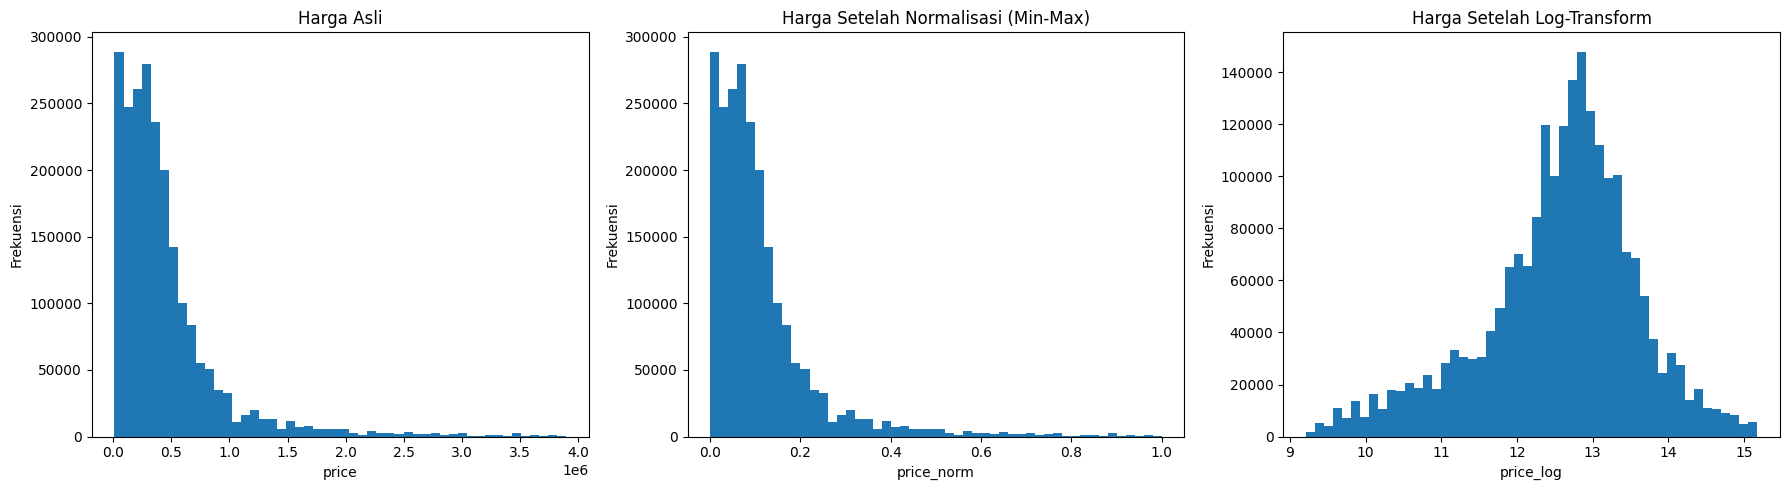

In [11]:
# VISUALISASI DATA (Distribusi Harga)
import matplotlib.pyplot as plt
import seaborn as sns
# Histogram harga sebelum normalisasi dan sesudah normalisasi
plt.figure(figsize=(18, 5))
# Histogram Harga Asli
plt.subplot(1, 3, 1)
plt.hist(df['price'], bins=50)
plt.title("Harga Asli")
plt.xlabel("price")
plt.ylabel("Frekuensi")
# Histogram Harga Normalisasi
plt.subplot(1, 3, 2)
plt.hist(df['price_norm'], bins=50)
plt.title("Harga Setelah Normalisasi (Min-Max)")
plt.xlabel("price_norm")
plt.ylabel("Frekuensi")
# Histogram Harga Log Transform
df['price_log'] = np.log1p(df['price'])  # log(1 + price)

plt.subplot(1, 3, 3)
plt.hist(df['price_log'], bins=50)
plt.title("Harga Setelah Log-Transform")
plt.xlabel("price_log")
plt.ylabel("Frekuensi")

plt.tight_layout()
plt.show()


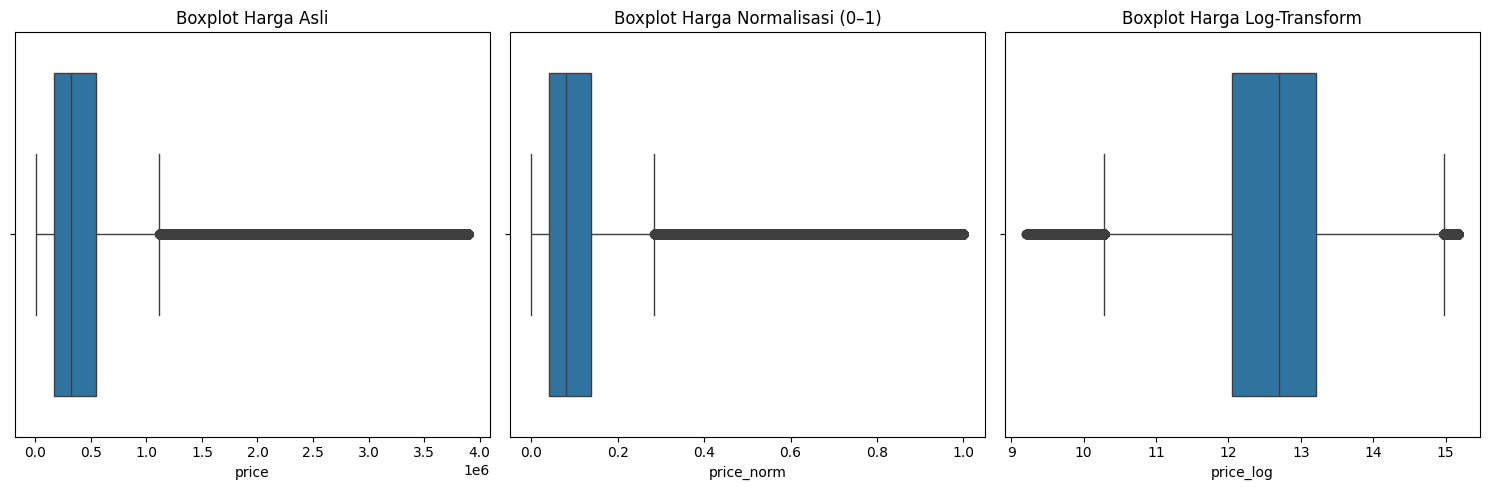

In [12]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.boxplot(x=df['price'])
plt.title("Boxplot Harga Asli")

plt.subplot(1, 3, 2)
sns.boxplot(x=df['price_norm'])
plt.title("Boxplot Harga Normalisasi (0–1)")

plt.subplot(1, 3, 3)
sns.boxplot(x=df['price_log'])
plt.title("Boxplot Harga Log-Transform")

plt.tight_layout()
plt.show()


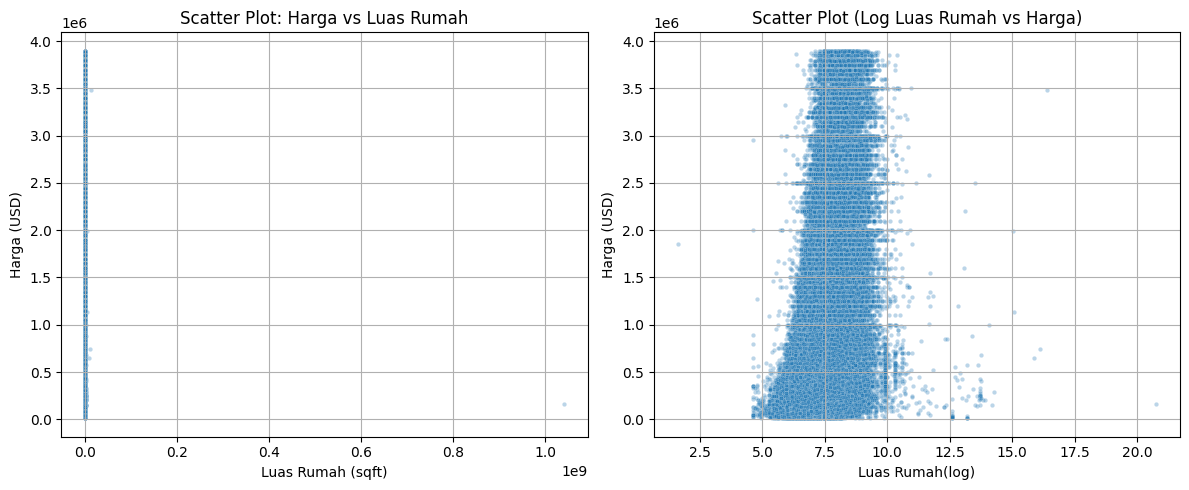

In [16]:
# SCATTER PLOT (Harga vs Luas Rumah)
# Buat kolom log dulu
df['house_size_log'] = np.log1p(df['house_size'])

# SCATTER PLOT (Harga vs Luas Rumah)
plt.figure(figsize=(12, 5))

# Scatter original
plt.subplot(1, 2, 1)
sns.scatterplot(x=df['house_size'], y=df['price'], alpha=0.3, s=10)
plt.title("Scatter Plot: Harga vs Luas Rumah")
plt.xlabel("Luas Rumah (sqft)")
plt.ylabel("Harga (USD)")
plt.grid(True)

# Scatter versi log
plt.subplot(1, 2, 2)
sns.scatterplot(x=df['house_size_log'], y=df['price'], alpha=0.3, s=10)
plt.title("Scatter Plot (Log Luas Rumah vs Harga)")
plt.xlabel("Luas Rumah(log)")
plt.ylabel("Harga (USD)")
plt.grid(True)

plt.tight_layout()
plt.show()


In [18]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import col, when
from pyspark.ml.feature import VectorAssembler, StringIndexer
from pyspark.ml.classification import RandomForestClassifier
from pyspark.ml import Pipeline
from pyspark.ml.tuning import ParamGridBuilder, CrossValidator
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
spark = SparkSession.builder.appName("USARealEstateML").getOrCreate()
sdf = spark.createDataFrame(df[['price_norm', 'area_norm', 'bed', 'bath', 'state']])

# Mampilkan struktur schema dan contoh data
sdf.printSchema()
sdf.show(5)

# MEMBUAT LABEL KLASIFIKASI (MAHAL vs MURAH)
print("\nMEMBUAT LABEL KLASIFIKASI")

# Ambil median dari kolom price_norm dari pandas sebagai threshold
median_price_norm = df['price_norm'].median()

# Buat kolom label di Spark DataFrame:
# label = 1 jika price_norm > median kategori "Mahal"
# label = 0 jika sebaliknya kategori "Murah"
sdf = sdf.withColumn(
    "label",
    when(col("price_norm") > median_price_norm, 1).otherwise(0)
)
sdf.show(5)


25/11/25 07:47:01 WARN Utils: Your hostname, erlyn-VirtualBox resolves to a loopback address: 127.0.1.1; using 10.0.2.15 instead (on interface enp0s3)
25/11/25 07:47:01 WARN Utils: Set SPARK_LOCAL_IP if you need to bind to another address
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
25/11/25 07:47:03 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


root
 |-- price_norm: double (nullable = true)
 |-- area_norm: double (nullable = true)
 |-- bed: double (nullable = true)
 |-- bath: double (nullable = true)
 |-- state: string (nullable = true)



25/11/25 07:48:04 WARN TaskSetManager: Stage 0 contains a task of very large size (12529 KiB). The maximum recommended task size is 1000 KiB.
25/11/25 07:48:10 WARN PythonRunner: Detected deadlock while completing task 0.0 in stage 0 (TID 0): Attempting to kill Python Worker
                                                                                

+--------------------+--------------------+---+----+-----------+
|          price_norm|           area_norm|bed|bath|      state|
+--------------------+--------------------+---+----+-----------+
| 0.02442837640358571|8.804302685021277E-7|3.0| 2.0|Puerto Rico|
| 0.01799978862803394|1.463859496647096...|4.0| 2.0|Puerto Rico|
| 0.01465692298474702|7.151093010541299E-7|2.0| 1.0|Puerto Rico|
| 0.03471411684446855|1.726258474050023...|4.0| 2.0|Puerto Rico|
|0.014142635962702876| 1.68781173743421E-6|6.0| 2.0|Puerto Rico|
+--------------------+--------------------+---+----+-----------+
only showing top 5 rows


MEMBUAT LABEL KLASIFIKASI


25/11/25 07:48:12 WARN TaskSetManager: Stage 1 contains a task of very large size (12529 KiB). The maximum recommended task size is 1000 KiB.


+--------------------+--------------------+---+----+-----------+-----+
|          price_norm|           area_norm|bed|bath|      state|label|
+--------------------+--------------------+---+----+-----------+-----+
| 0.02442837640358571|8.804302685021277E-7|3.0| 2.0|Puerto Rico|    0|
| 0.01799978862803394|1.463859496647096...|4.0| 2.0|Puerto Rico|    0|
| 0.01465692298474702|7.151093010541299E-7|2.0| 1.0|Puerto Rico|    0|
| 0.03471411684446855|1.726258474050023...|4.0| 2.0|Puerto Rico|    0|
|0.014142635962702876| 1.68781173743421E-6|6.0| 2.0|Puerto Rico|    0|
+--------------------+--------------------+---+----+-----------+-----+
only showing top 5 rows



In [20]:
print("\nTRAINING MODEL RANDOM FOREST DENGAN CROSS-VALIDATION")

# Encoding fitur kategorikal (state)
state_indexer = StringIndexer(inputCol="state", outputCol="state_index")

# Menggabungkan semua fitur ke dalam satu vector fitur
assembler = VectorAssembler(
    inputCols=["price_norm", "area_norm", "bed", "bath", "state_index"],
    outputCol="features"
)

# Definisikan model Random Forest dengan maxBins yang cukup besar (≥ jumlah kategori state)
rf = RandomForestClassifier(labelCol="label", featuresCol="features", maxBins=64)

# Pipeline yang menggabungkan tahap encoding, assembling fitur, dan model
pipeline = Pipeline(stages=[state_indexer, assembler, rf])

# Split data ke train dan test (80% train, 20% test)
train, test = sdf.randomSplit([0.8, 0.2], seed=42)

# Menentukan grid parameter untuk tuning hyperparameter Random Forest
paramGrid = ParamGridBuilder() \
    .addGrid(rf.numTrees, [20, 50]) \
    .addGrid(rf.maxDepth, [5, 10]) \
    .build()

# Evaluator untuk akurasi
evaluator = MulticlassClassificationEvaluator(
    labelCol="label", predictionCol="prediction", metricName="accuracy"
)

# Setup CrossValidator dengan 3 fold CV
crossval = CrossValidator(
    estimator=pipeline,
    estimatorParamMaps=paramGrid,
    evaluator=evaluator,
    numFolds=3
)

# Training model dengan cross-validation pada data training
cvModel = crossval.fit(train)

# Prediksi pada data test
predictions = cvModel.transform(test)
predictions.show(5)

# Evaluasi hasil prediksi
accuracy = evaluator.evaluate(predictions)
print(f"Akurasi Model: {accuracy:.4f}")

# Evaluasi : precision, recall, f1-score
precision_evaluator = MulticlassClassificationEvaluator(
    labelCol="label", predictionCol="prediction", metricName="weightedPrecision"
)
recall_evaluator = MulticlassClassificationEvaluator(
    labelCol="label", predictionCol="prediction", metricName="weightedRecall"
)
f1_evaluator = MulticlassClassificationEvaluator(
    labelCol="label", predictionCol="prediction", metricName="f1"
)

precision = precision_evaluator.evaluate(predictions)
recall = recall_evaluator.evaluate(predictions)
f1 = f1_evaluator.evaluate(predictions)

print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

# Confusion Matrix
print("\nConfusion Matrix:")
predictions.groupBy("label", "prediction").count().show()




TRAINING MODEL RANDOM FOREST DENGAN CROSS-VALIDATION


25/11/25 08:07:52 WARN CacheManager: Asked to cache already cached data.
25/11/25 08:07:52 WARN CacheManager: Asked to cache already cached data.
25/11/25 08:07:52 WARN TaskSetManager: Stage 35 contains a task of very large size (12529 KiB). The maximum recommended task size is 1000 KiB.
25/11/25 08:07:53 WARN TaskSetManager: Stage 38 contains a task of very large size (12529 KiB). The maximum recommended task size is 1000 KiB.
25/11/25 08:07:54 WARN TaskSetManager: Stage 41 contains a task of very large size (12529 KiB). The maximum recommended task size is 1000 KiB.
25/11/25 08:07:54 WARN TaskSetManager: Stage 42 contains a task of very large size (12529 KiB). The maximum recommended task size is 1000 KiB.
25/11/25 08:07:55 WARN TaskSetManager: Stage 43 contains a task of very large size (12529 KiB). The maximum recommended task size is 1000 KiB.
25/11/25 08:07:56 WARN TaskSetManager: Stage 45 contains a task of very large size (12529 KiB). The maximum recommended task size is 1000 K

+--------------------+--------------------+---+----+--------------+-----+-----------+--------------------+--------------------+--------------------+----------+
|          price_norm|           area_norm|bed|bath|         state|label|state_index|            features|       rawPrediction|         probability|prediction|
+--------------------+--------------------+---+----+--------------+-----+-----------+--------------------+--------------------+--------------------+----------+
|1.283146120000132E-4|7.804687533010127E-7|3.0| 1.0|          Ohio|    0|       11.0|[1.28314612000013...|[49.9964079777554...|[0.99992815955510...|       0.0|
|1.283146120000132E-4| 1.68781173743421E-6|3.0| 2.0|      New York|    0|        3.0|[1.28314612000013...|          [50.0,0.0]|           [1.0,0.0]|       0.0|
|1.283146120000132E-4| 1.68781173743421E-6|3.0| 2.0|      New York|    0|        3.0|[1.28314612000013...|          [50.0,0.0]|           [1.0,0.0]|       0.0|
|1.283146120000132E-4| 1.68781173743421E

25/11/25 08:14:27 WARN DAGScheduler: Broadcasting large task binary with size 1535.6 KiB
25/11/25 08:14:27 WARN TaskSetManager: Stage 397 contains a task of very large size (12529 KiB). The maximum recommended task size is 1000 KiB.


Akurasi Model: 0.9919


25/11/25 08:14:30 WARN DAGScheduler: Broadcasting large task binary with size 1535.6 KiB
25/11/25 08:14:30 WARN TaskSetManager: Stage 399 contains a task of very large size (12529 KiB). The maximum recommended task size is 1000 KiB.
25/11/25 08:14:34 WARN DAGScheduler: Broadcasting large task binary with size 1535.6 KiB
25/11/25 08:14:34 WARN TaskSetManager: Stage 401 contains a task of very large size (12529 KiB). The maximum recommended task size is 1000 KiB.
                                                                                

Precision: 0.9920
Recall: 0.9919
F1 Score: 0.9919

Confusion Matrix:


25/11/25 08:14:37 WARN DAGScheduler: Broadcasting large task binary with size 1532.2 KiB
25/11/25 08:14:37 WARN TaskSetManager: Stage 403 contains a task of very large size (12529 KiB). The maximum recommended task size is 1000 KiB.
[Stage 403:================>                                        (2 + 5) / 7]

+-----+----------+------+
|label|prediction| count|
+-----+----------+------+
|    1|       0.0|  2417|
|    0|       0.0|218520|
|    1|       1.0|213896|
|    0|       1.0|  1096|
+-----+----------+------+



25/11/25 08:14:41 WARN DAGScheduler: Broadcasting large task binary with size 1520.7 KiB
                                                                                

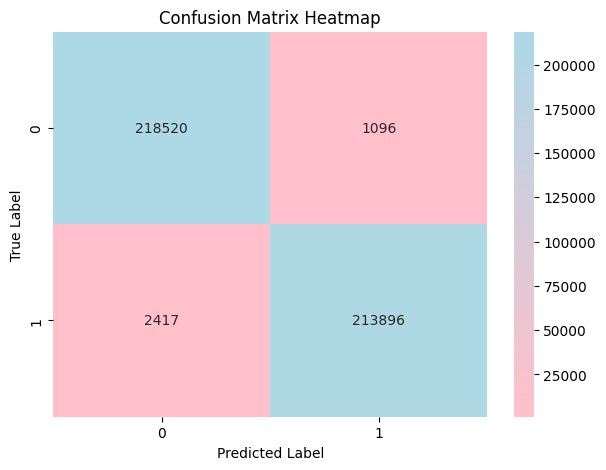

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from matplotlib.colors import LinearSegmentedColormap

# Contoh confusion matrix
cm = np.array([[218520, 1096],
               [2417, 213896]])

labels = ['0', '1']

# Colormap pink muda ke biru muda
colors = ["#ffc0cb", "#add8e6"]  # light pink ke light blue
cmap = LinearSegmentedColormap.from_list("light_pink_blue", colors)

plt.figure(figsize=(7,5))
sns.heatmap(cm, annot=True, fmt='d', cmap=cmap, xticklabels=labels, yticklabels=labels)

plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix Heatmap')

plt.show()


